# **About Dataset**

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :

- **CUST_ID** : Identification of Credit Card holder (Categorical)
- **BALANCE** : Balance amount left in their account to make purchases
- **BALANCE_FREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- **PURCHASES** : Amount of purchases made from account
- **ONEOFF_PURCHASES** : Maximum purchase amount done in one-go
- **INSTALLMENTS_PURCHASES** : Amount of purchase done in installment
- **CASH_ADVANCE** : Cash in advance given by the user
- **PURCHASES_FREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- **ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- **PURCHASESINSTALLMENTSFREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- **CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid
- **CASHADVANCETRX** : Number of Transactions made with "Cash in Advanced"
- **PURCHASES_TRX** : Number of purchase transactions made
- **CREDIT_LIMIT** : Limit of Credit Card for user
- **PAYMENTS** : Amount of Payment done by user
- **MINIMUM_PAYMENTS** : Minimum amount of payments made by user
- **PRCFULLPAYMENT** : Percent of full payment paid by user
- **TENURE** : Tenure of credit card service for user

# **Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

import warnings

warnings.filterwarnings('ignore')

# **Load Dataset**

In [2]:
df = pd.read_csv('dataset/CC_GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [5]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

# **EDA**

1. Correlation Matrix

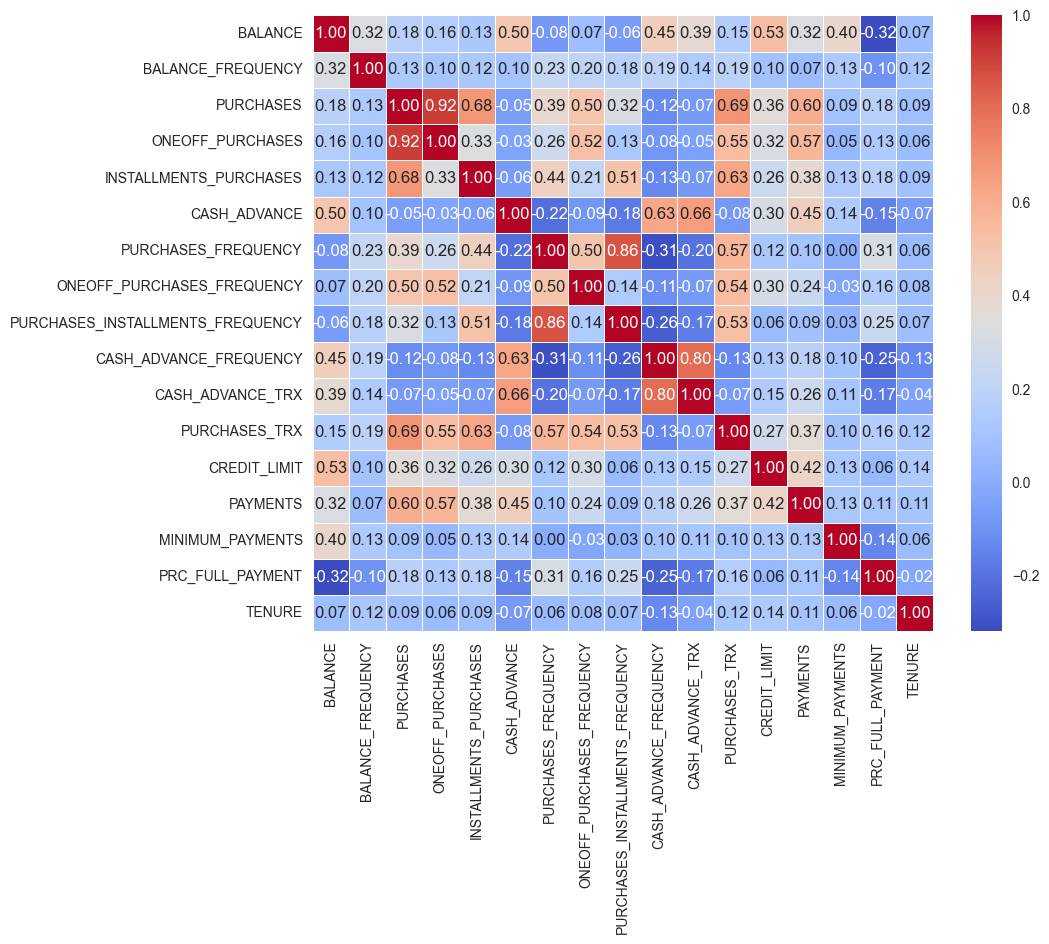

In [6]:
cc_df = df.select_dtypes(exclude='object')

plt.figure(figsize=(10, 8))
sns.heatmap(cc_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

2. Balance Analysis

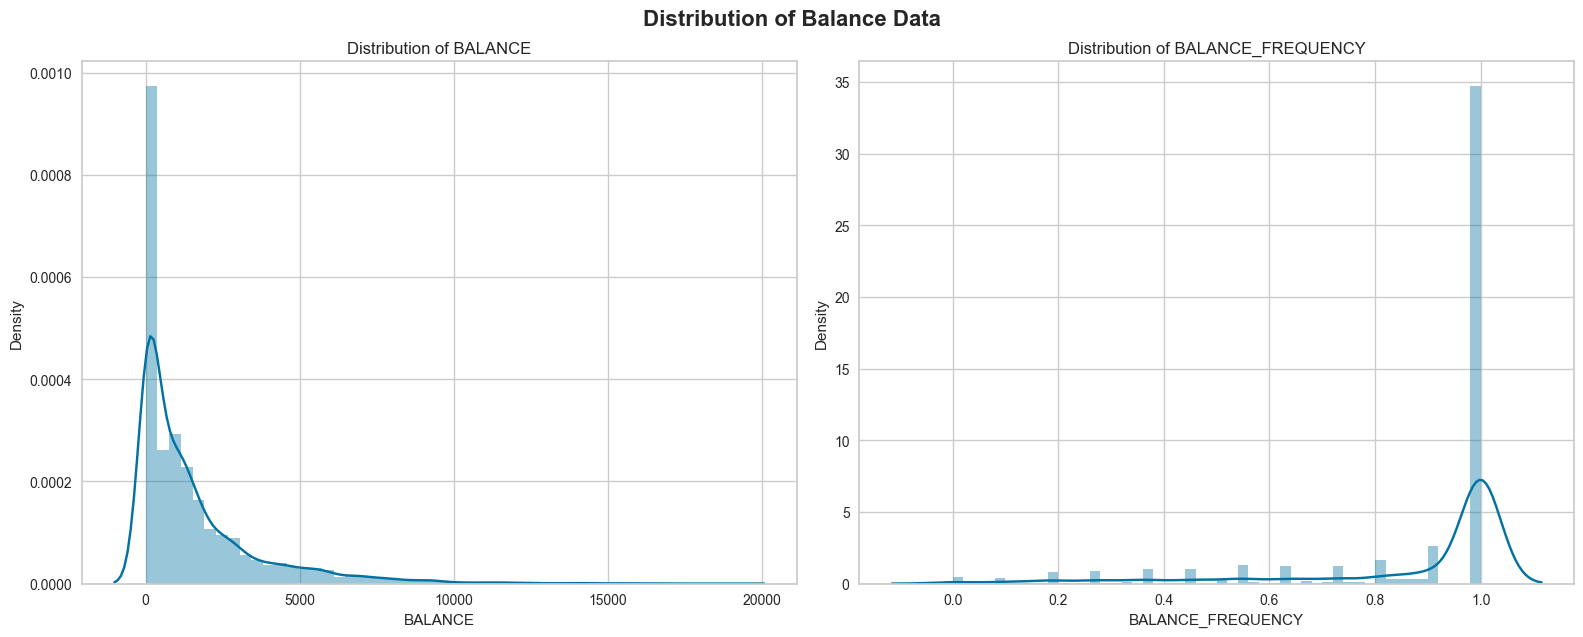

In [7]:
balance_data = df.filter(like='BALANCE')

plt.figure(figsize=(16, 12))
plt.suptitle('Distribution of Balance Data', fontweight='bold', fontsize=16)
for i,col in enumerate(balance_data.columns,1):
    plt.subplot(2,2,i)
    plt.title(f"Distribution of {col}")
    sns.distplot(balance_data[col], kde=True)
    plt.grid(True)
    plt.tight_layout()
    plt.plot()

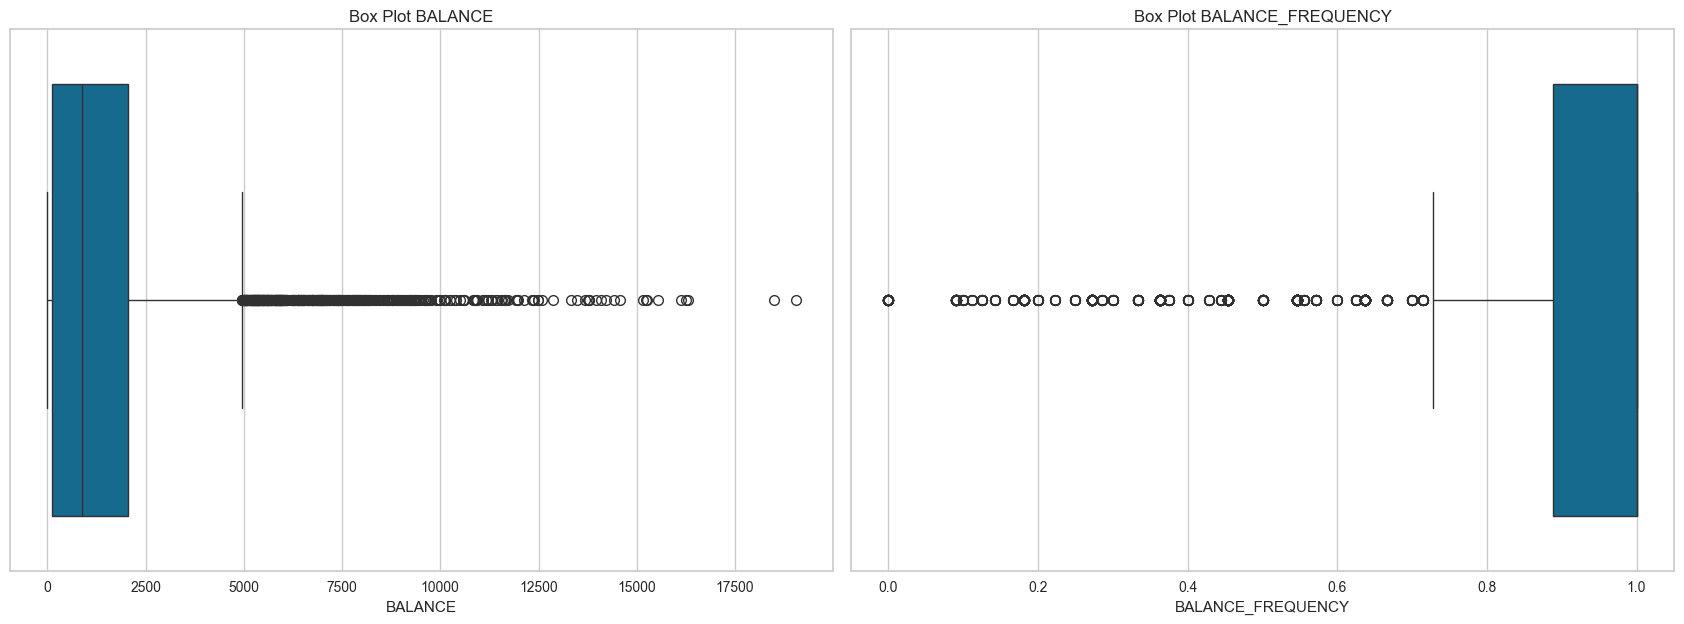

In [8]:
plt.figure(figsize=(17, 12))
for i, col in enumerate(balance_data, start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=balance_data[col])
    plt.title(f'Box Plot {col}')

plt.tight_layout()
plt.show()

3. Purchase Analysis

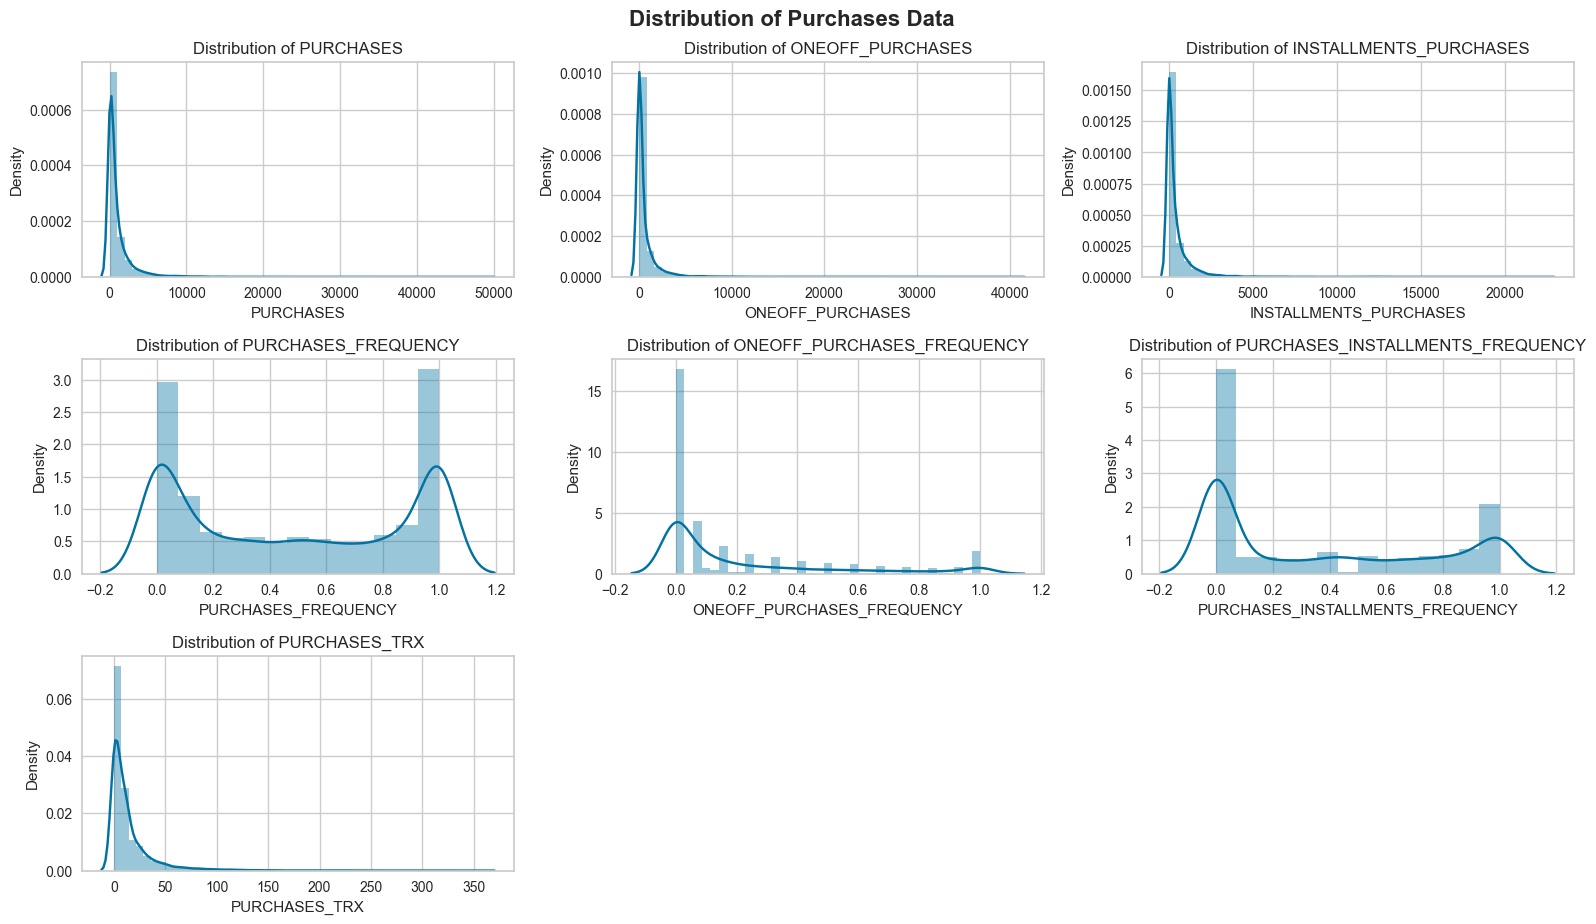

In [9]:
purchases_data = df.filter(like='PURCHASES')

plt.figure(figsize=(16, 12))
plt.suptitle('Distribution of Purchases Data', fontweight='bold', fontsize=16)
for i,col in enumerate(purchases_data.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col}")
    sns.distplot(purchases_data[col], kde=True)
    plt.grid(True)
    plt.tight_layout()
    plt.plot()

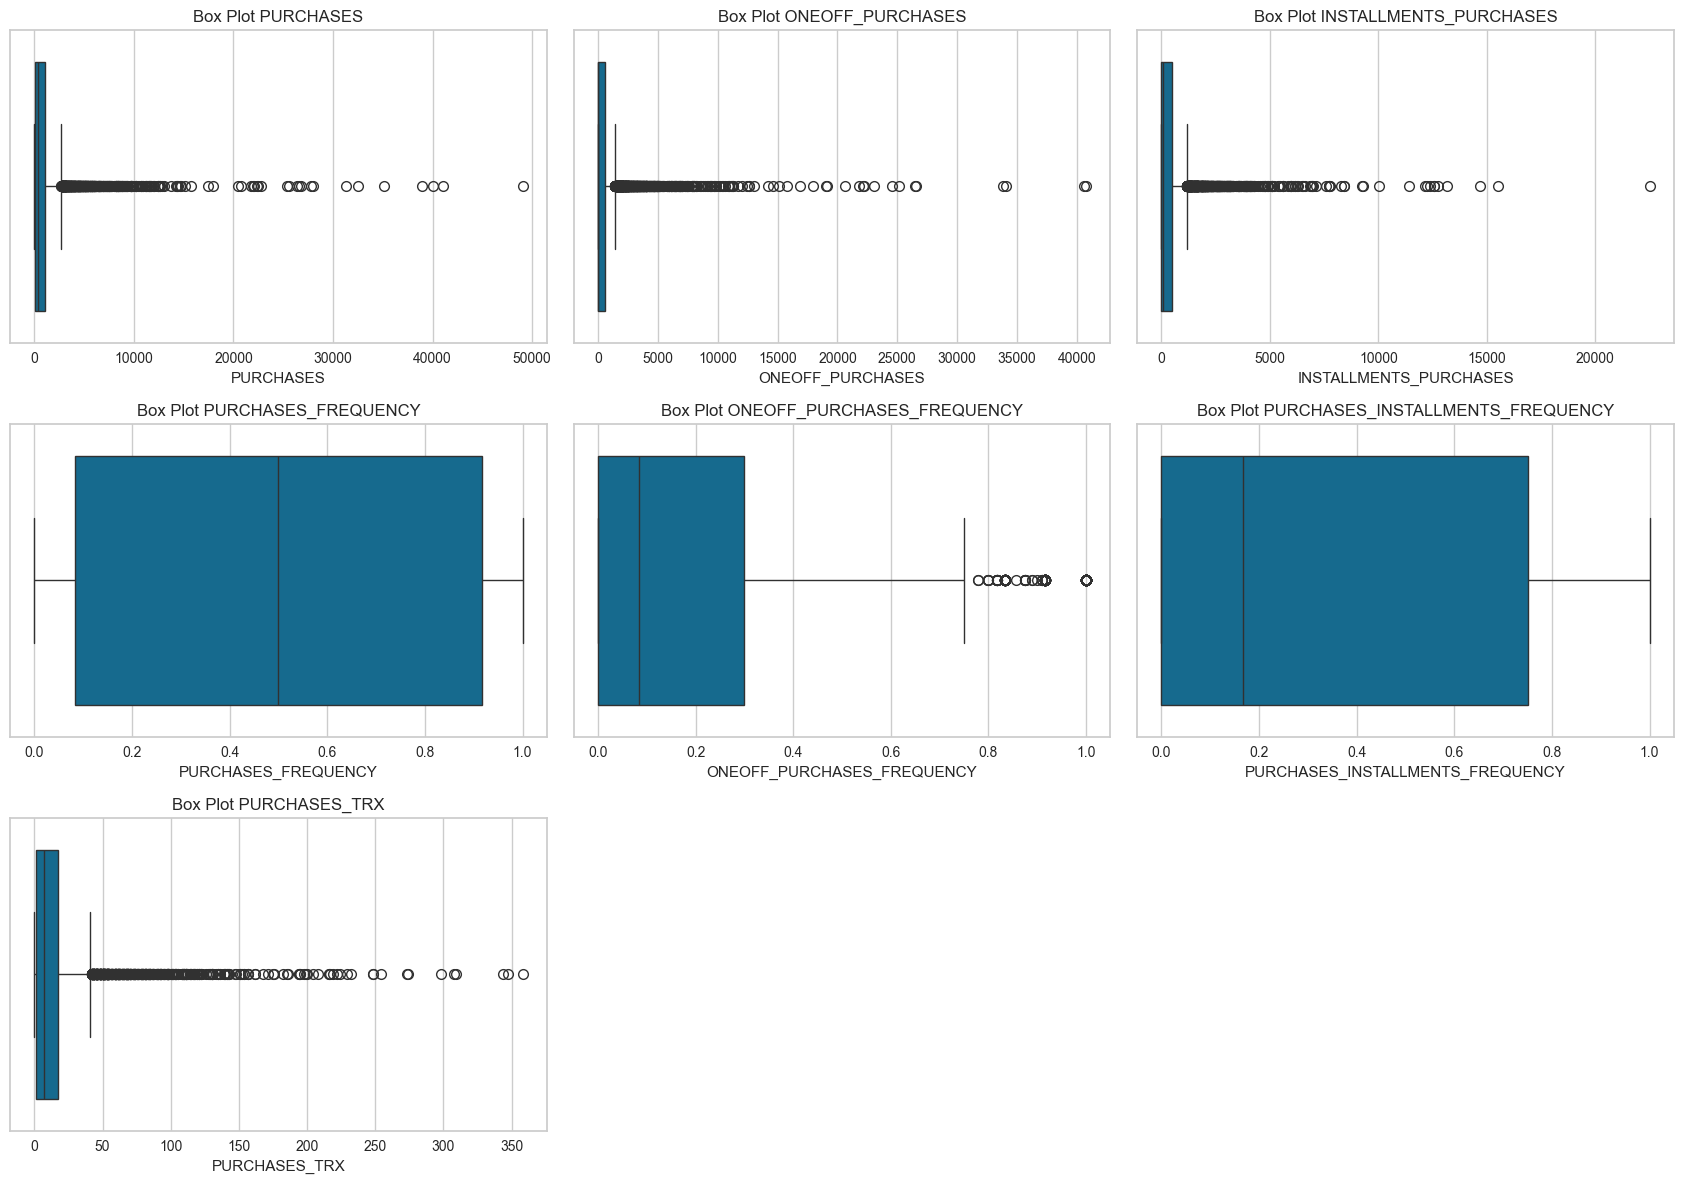

In [10]:
plt.figure(figsize=(17, 12))
for i, col in enumerate(purchases_data.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=purchases_data[col])
    plt.title(f'Box Plot {col}')

plt.tight_layout()
plt.show()

3. Cash Analysis

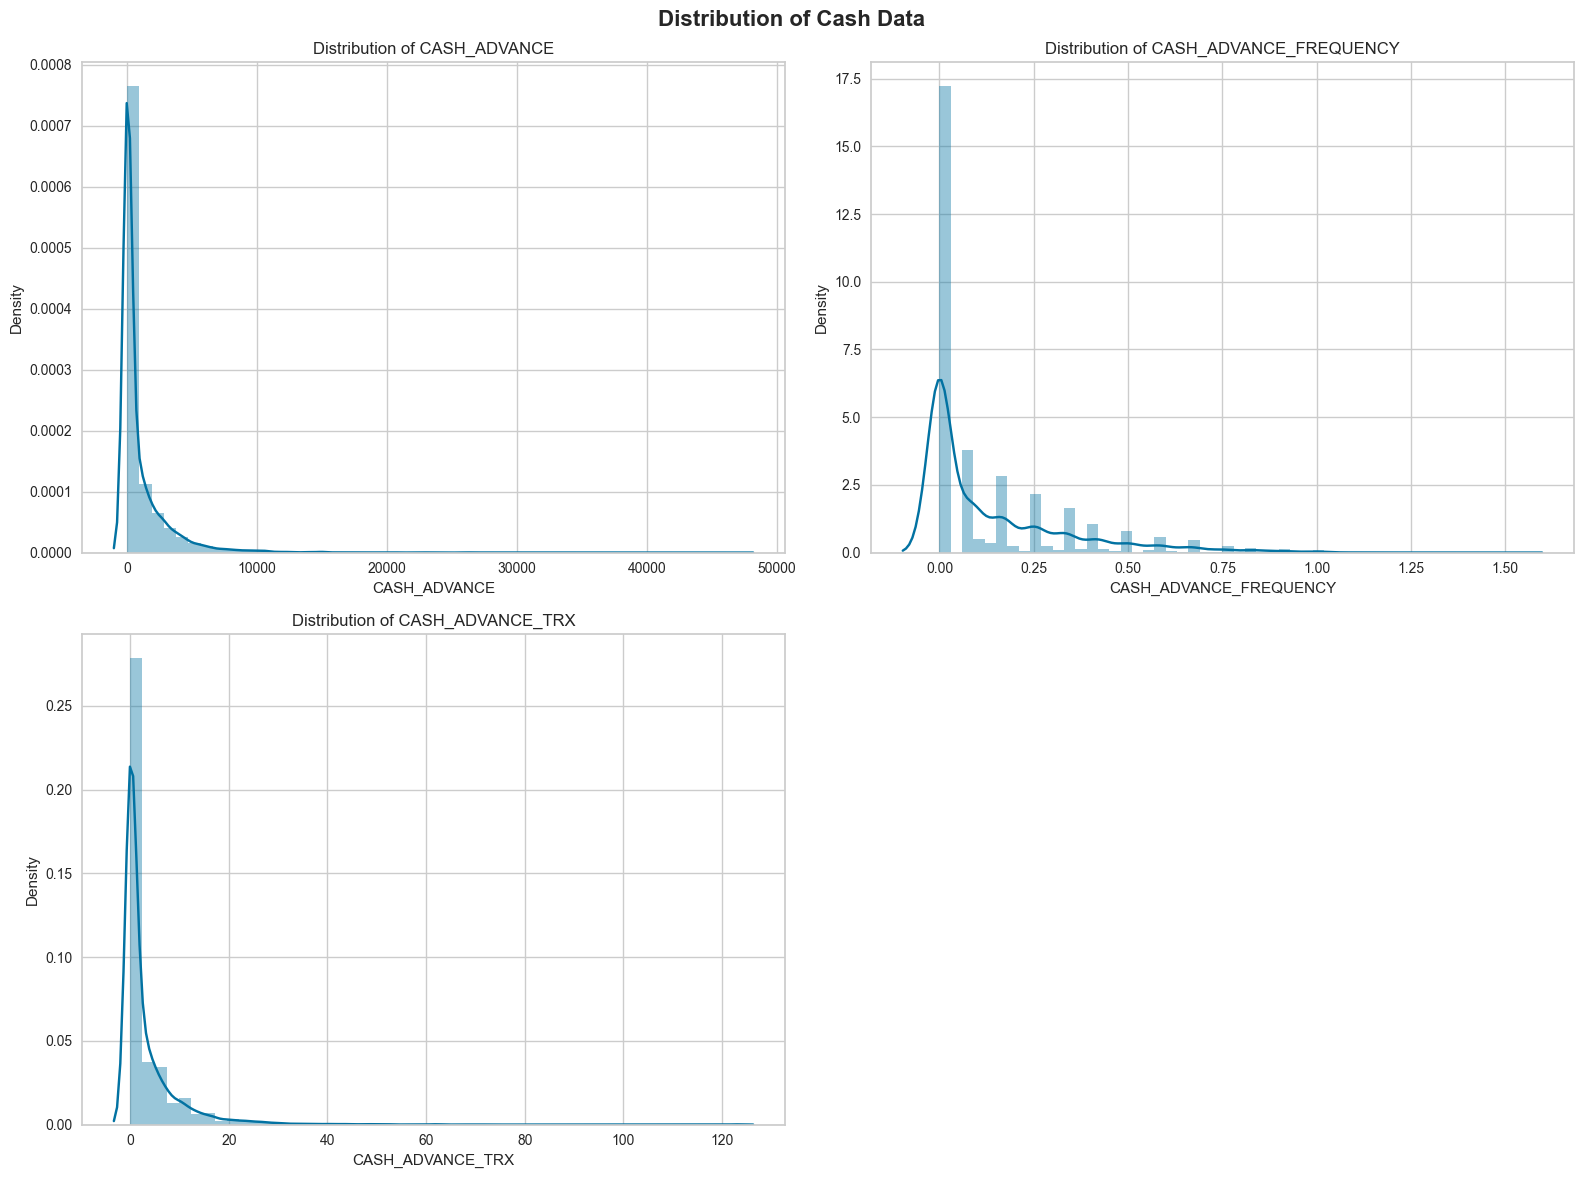

In [11]:
cash_data = df.filter(like='CASH')

plt.figure(figsize=(16, 12))
plt.suptitle('Distribution of Cash Data', fontweight='bold', fontsize=16)
for i,col in enumerate(cash_data.columns,1):
    plt.subplot(2,2,i)
    plt.title(f"Distribution of {col}")
    sns.distplot(cash_data[col], kde=True)
    plt.grid(True)
    plt.tight_layout()
    plt.plot()

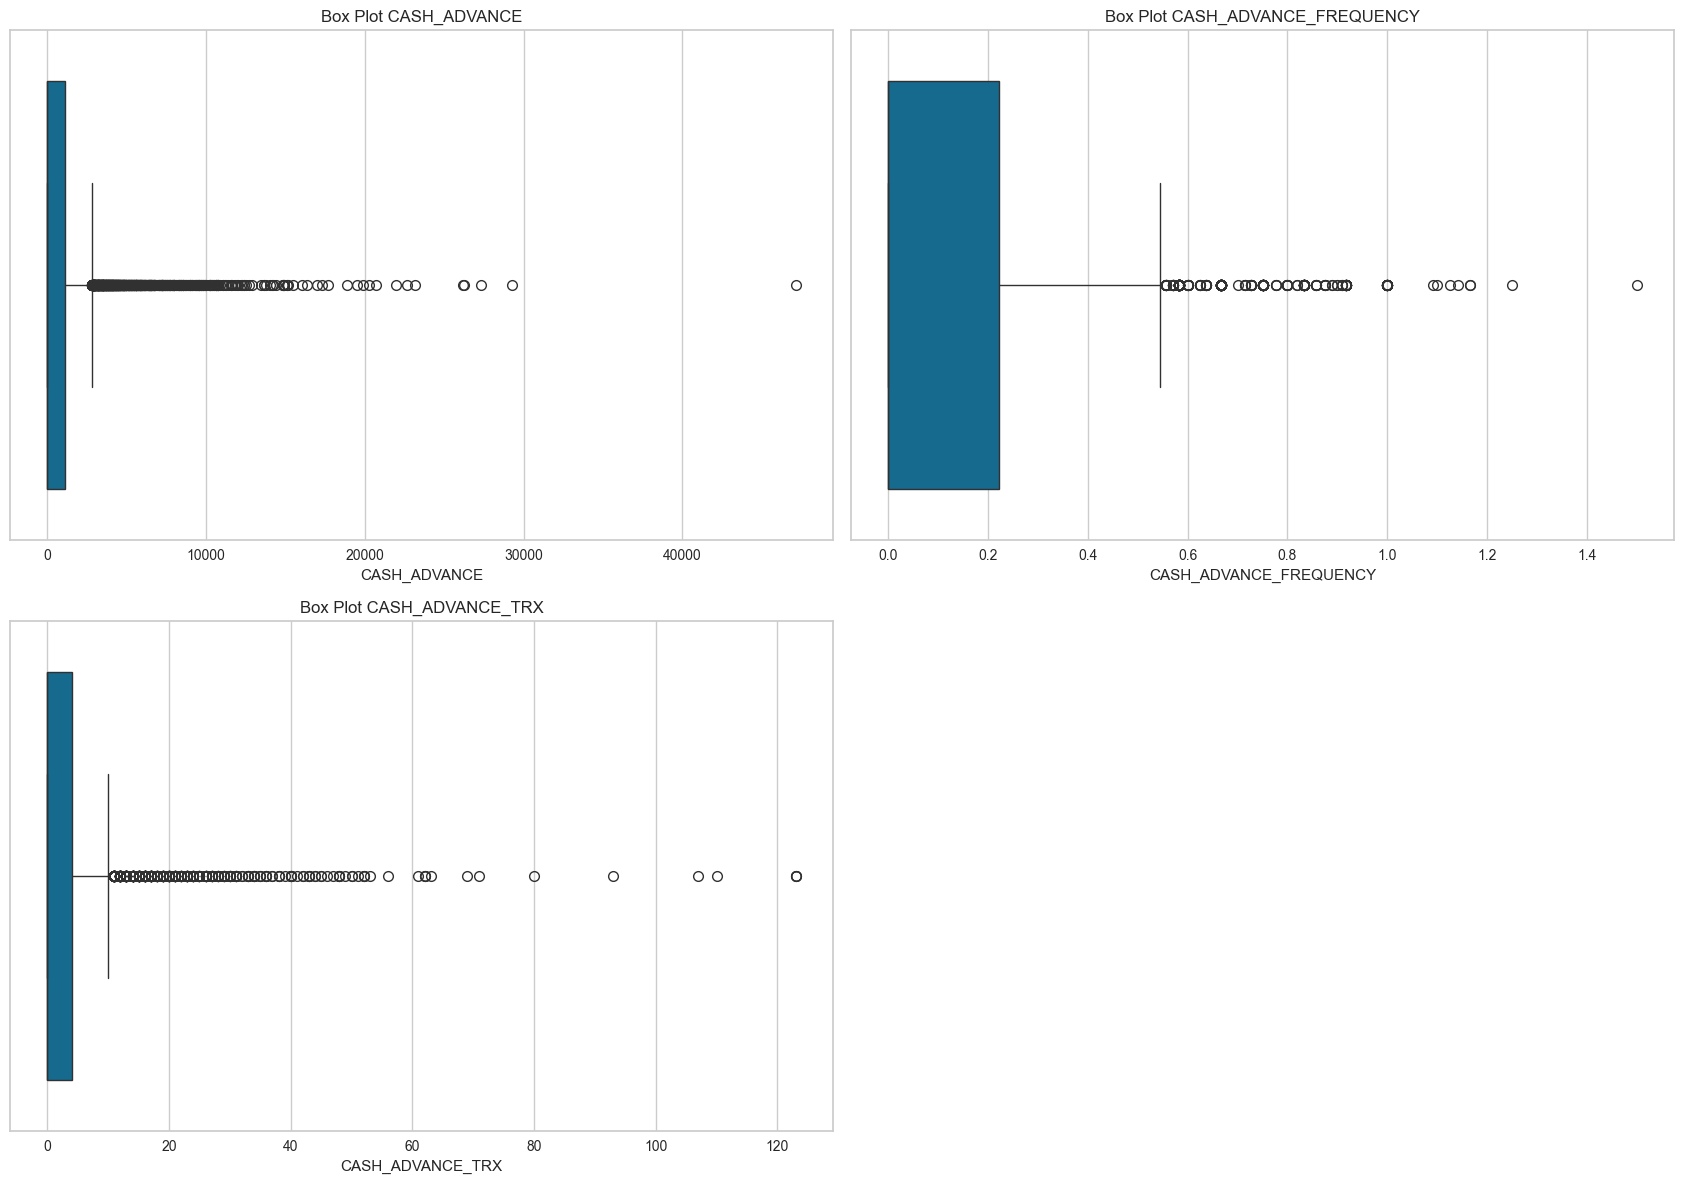

In [12]:
plt.figure(figsize=(17, 12))
for i, col in enumerate(cash_data.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=cash_data[col])
    plt.title(f'Box Plot {col}')

plt.tight_layout()
plt.show()

4. Payment Analysis

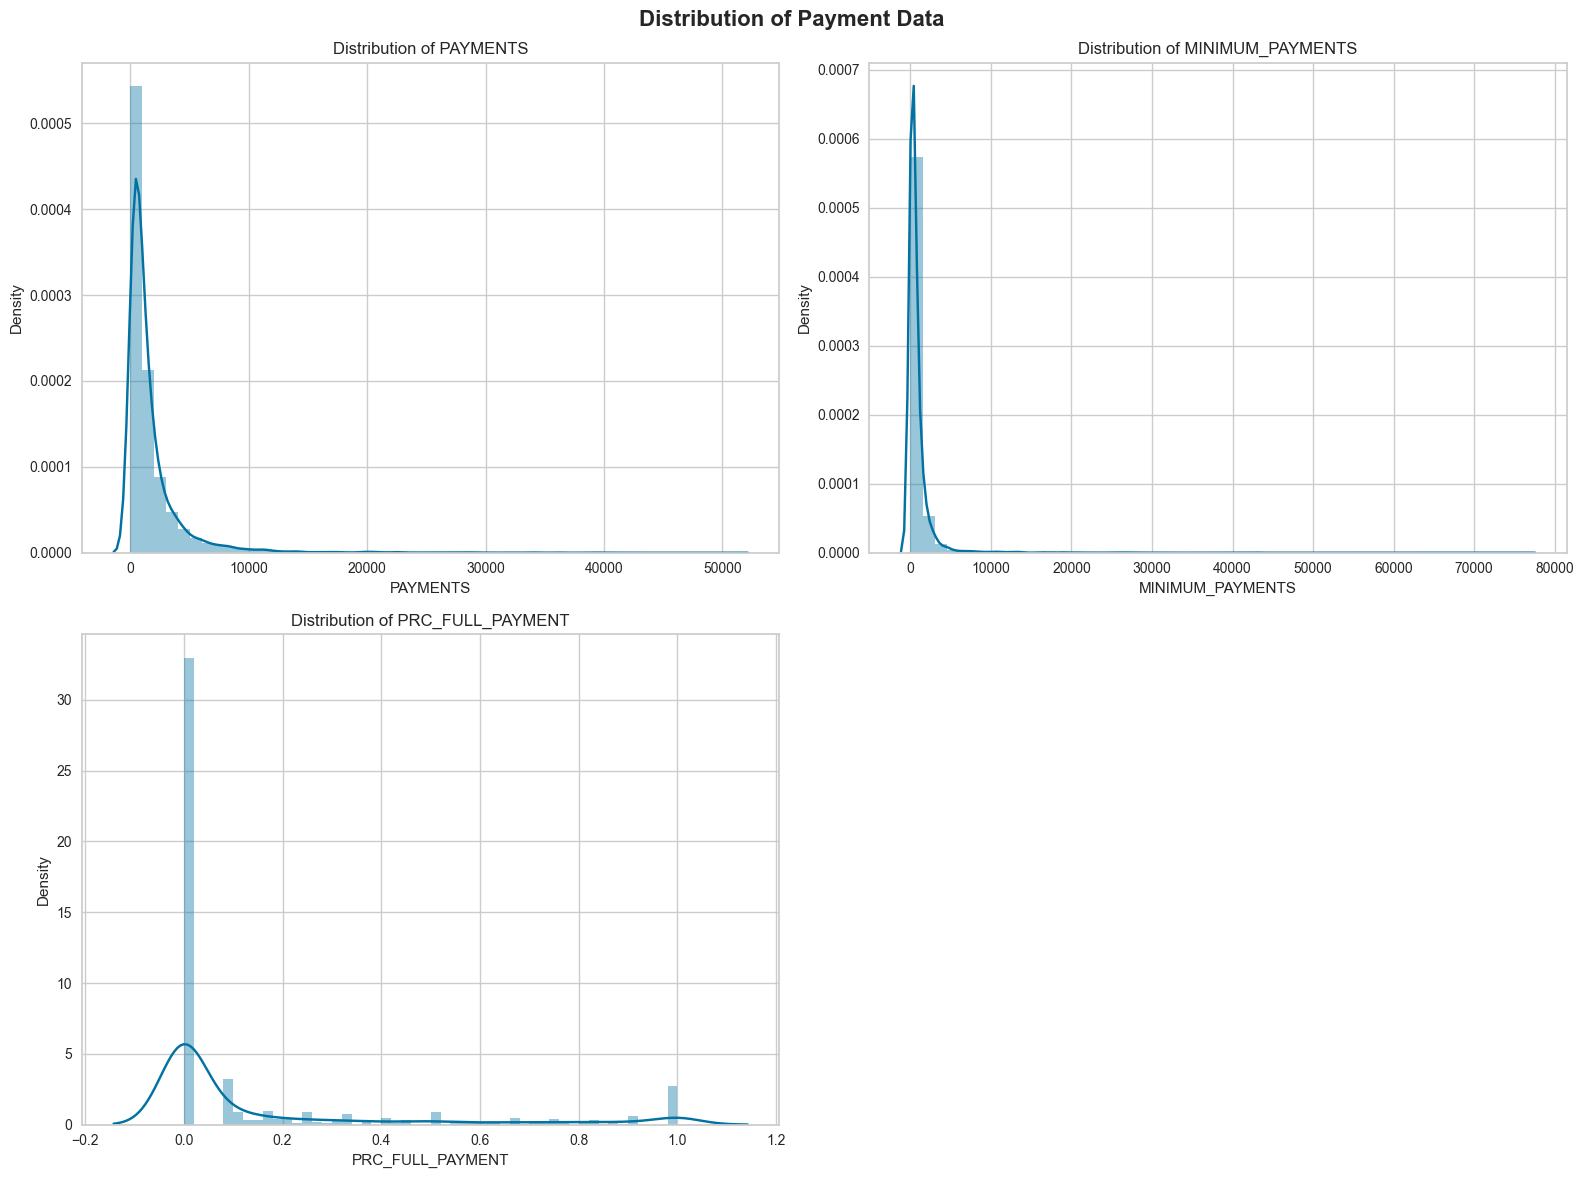

In [13]:
payment_data = df.filter(like='PAYMENT')

plt.figure(figsize=(16, 12))
plt.suptitle('Distribution of Payment Data', fontweight='bold', fontsize=16)
for i,col in enumerate(payment_data.columns,1):
    plt.subplot(2,2,i)
    plt.title(f"Distribution of {col}")
    sns.distplot(payment_data[col], kde=True)
    plt.grid(True)
    plt.tight_layout()
    plt.plot()

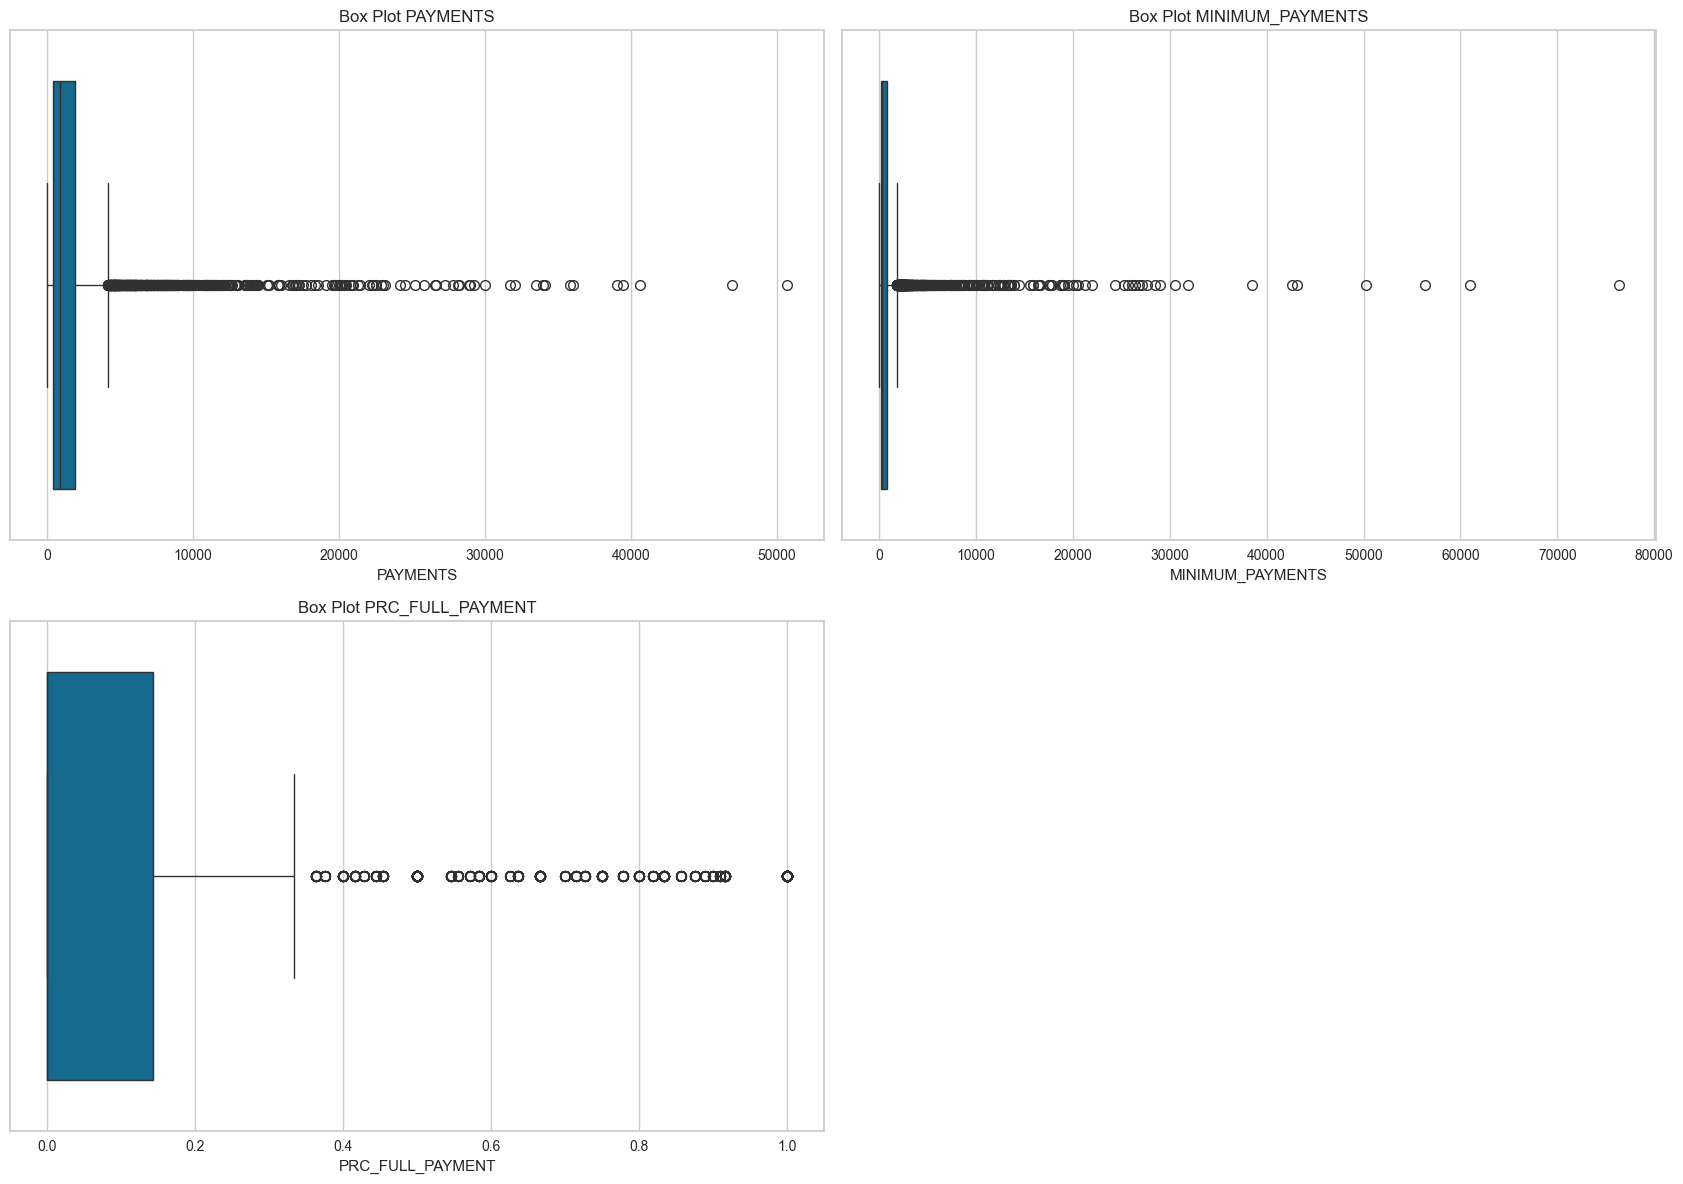

In [14]:
plt.figure(figsize=(17, 12))
for i, col in enumerate(payment_data.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=payment_data[col])
    plt.title(f'Box Plot {col}')

plt.tight_layout()
plt.show()

5. BALANCE VS MINIMUM_PAYMENT

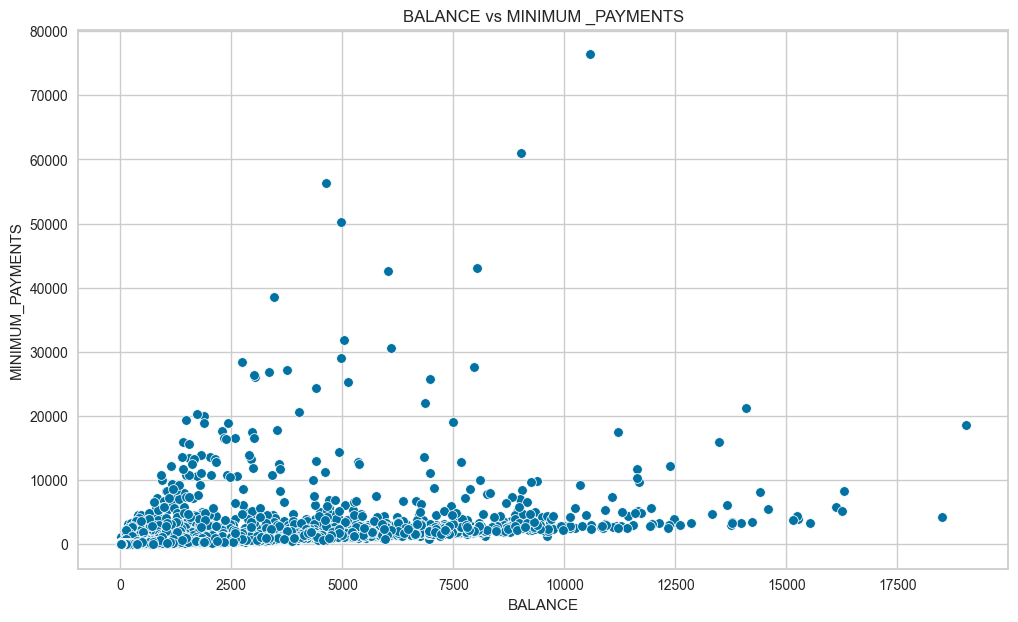

In [15]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='BALANCE', y='MINIMUM_PAYMENTS', data=df)

plt.title('BALANCE vs MINIMUM _PAYMENTS')
plt.grid(True)
plt.show()

6. PAYMENTS vs MINIMUM_PAYMENT

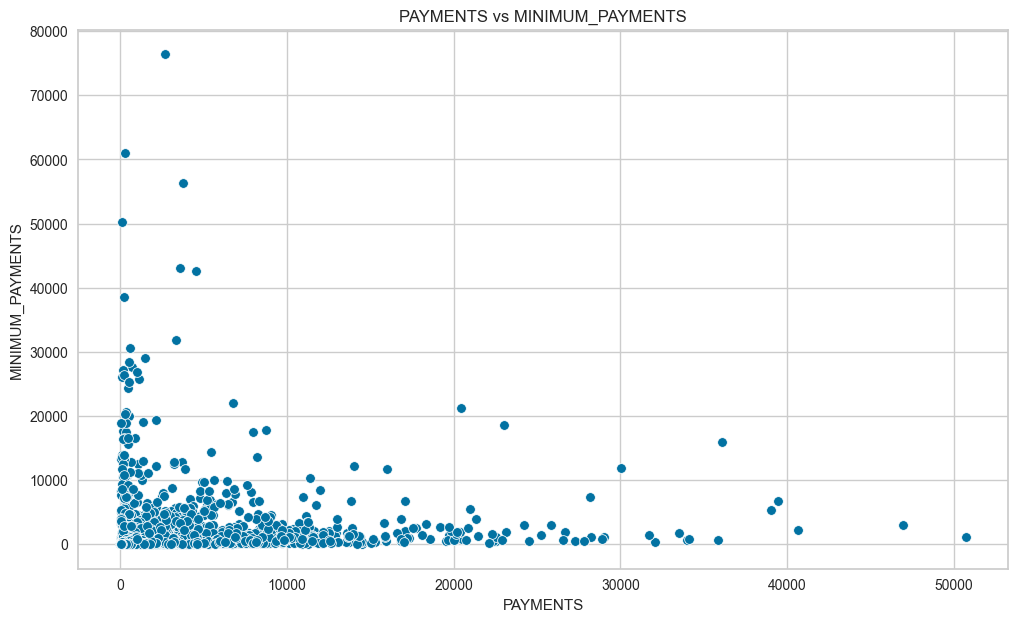

In [16]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='PAYMENTS', y='MINIMUM_PAYMENTS', data=df)

plt.title('PAYMENTS vs MINIMUM_PAYMENTS')
plt.grid(True)
plt.show()

7. PRC_FULL_PAYMENT vs MINIMUM_PAYMENTS

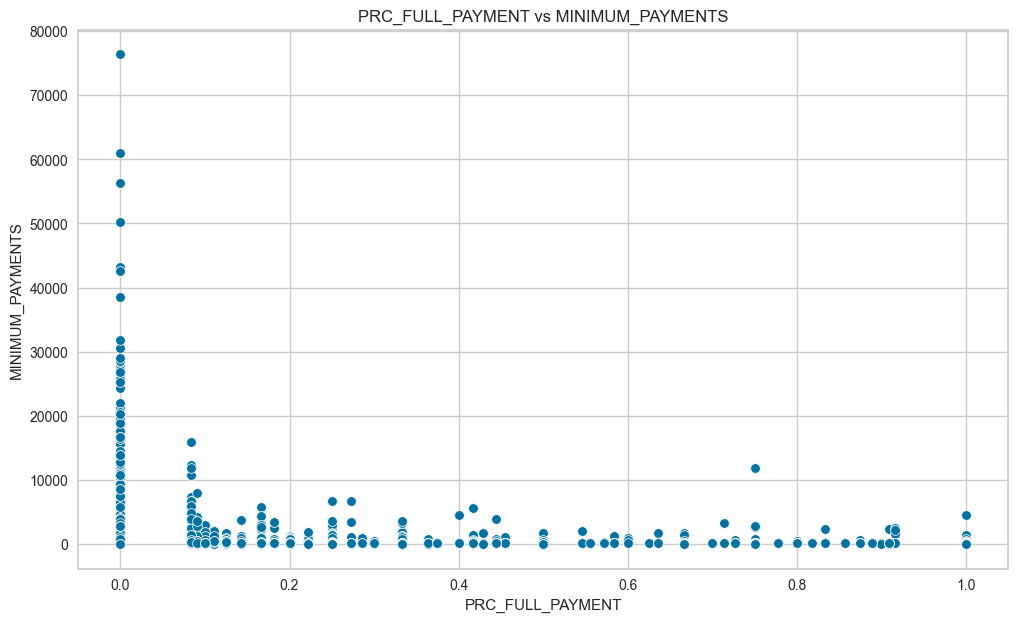

In [17]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='PRC_FULL_PAYMENT', y='MINIMUM_PAYMENTS', data=df)

plt.title('PRC_FULL_PAYMENT vs MINIMUM_PAYMENTS')
plt.grid(True)
plt.show()

8. Analysis the Missing Value

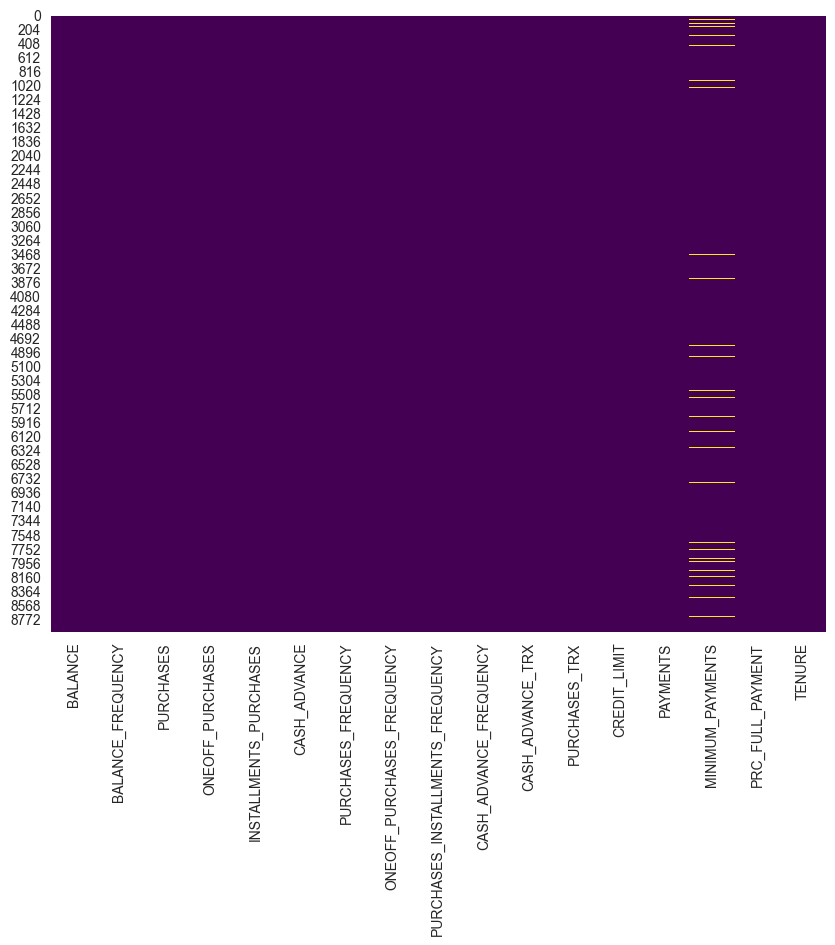

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(cc_df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [19]:
null_data = cc_df[cc_df['MINIMUM_PAYMENTS'].isnull()]

In [20]:
null_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


### **Summary**:
- **Skewed Data Distribution**:

The data distribution exhibits skewness, indicating that the distribution is not symmetrical. This skewness can influence the interpretation of statistical measures such as mean and median.

- **Presence of Numerous Outliers**:

The dataset contains a significant number of outliers. Outliers are data points that deviate significantly from the majority of the data and can impact the robustness of statistical analyses.

- **Missing Values in the Data**:

Upon analyzing the dataset, it has been determined that the missing values exhibit a random pattern. This means that there is no discernible or systematic relationship between the missing values and other variables in the dataset. The occurrence of missing values seems to be arbitrary and does not follow any specific trend or pattern.

# **Data Prepocessing**

1. Dealing with Missing Value

Since there is only 1 missing value in the CREDIT_LIMIT column, I will drop that missing value.

In [21]:
cc_df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

For MINIMUM_PAYMENTS I will use a KNNimputer

In [22]:
imputer = KNNImputer(n_neighbors=3)

cc_df['MINIMUM_PAYMENTS'] = imputer.fit_transform(cc_df[['MINIMUM_PAYMENTS']])

2. Data Standardization

In [23]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cc_df)

# **Modeling**

1. Model Training using KMean

In [24]:
kmeans = KMeans(n_clusters=2, init='k-means++')

kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [25]:
kmeans.inertia_

127773.32458163684

- Model Evaluation

Determine the optimal number of clusters using elbow method

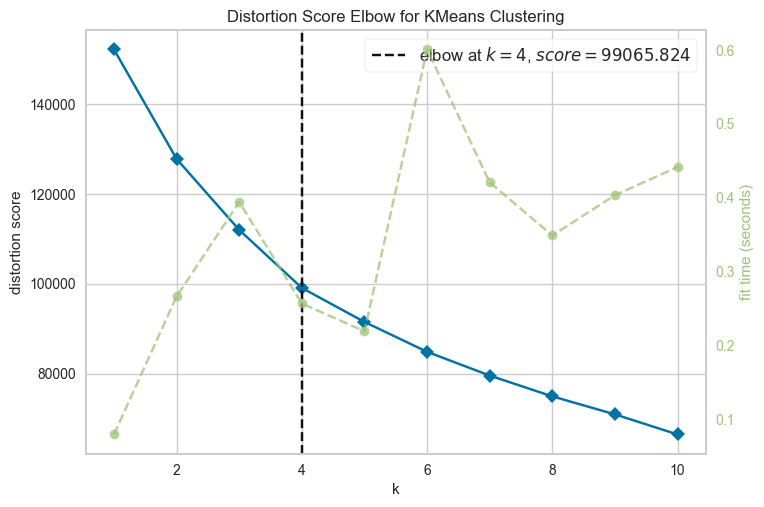

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(1, 11))
elbow.fit(data_scaled)
elbow.show()

Silhouette Score

In [27]:
for i in range(2, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)

    labels = kmeans.labels_

    silhouette = silhouette_score(data_scaled, labels)
    print(f"n_cluster = {i}, silhouette score = {silhouette}")

n_cluster = 2, silhouette score = 0.20947104379810635
n_cluster = 3, silhouette score = 0.25052128608398405
n_cluster = 4, silhouette score = 0.1975866678555425
n_cluster = 5, silhouette score = 0.19300597887908955
n_cluster = 6, silhouette score = 0.20271195331434438
n_cluster = 7, silhouette score = 0.2151779532938961
n_cluster = 8, silhouette score = 0.22104606947943667
n_cluster = 9, silhouette score = 0.22603859589163727
n_cluster = 10, silhouette score = 0.2201829540248119
n_cluster = 11, silhouette score = 0.21903621328023878


In [28]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)

kmeans.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

Assign the label

In [29]:
cc_df['cluster'] = kmeans.labels_
cc_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.304943,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


Analyze the result

In [30]:
grouped_cluster = cc_df.groupby('cluster')
for cluster, data in grouped_cluster:
    print(f"Cluster {cluster}:\n{data.describe()}\n")

Cluster 0:
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1235.000000        1235.000000   1235.000000       1235.000000   
mean    2220.003291           0.981477   4268.520980       2717.828543   
std     2578.113212           0.074061   4271.091794       3627.676264   
min       12.423203           0.090909    498.170000          0.000000   
25%      368.649661           1.000000   2147.515000        916.990000   
50%     1239.889457           1.000000   3129.670000       1789.700000   
75%     3178.144796           1.000000   4792.340000       3205.560000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1235.000000   1235.000000          1235.000000   
mean              1551.178267    458.421147             0.949093   
std               1863.794352   1327.302415             0.115520   
min                  0.000000      0.000000       

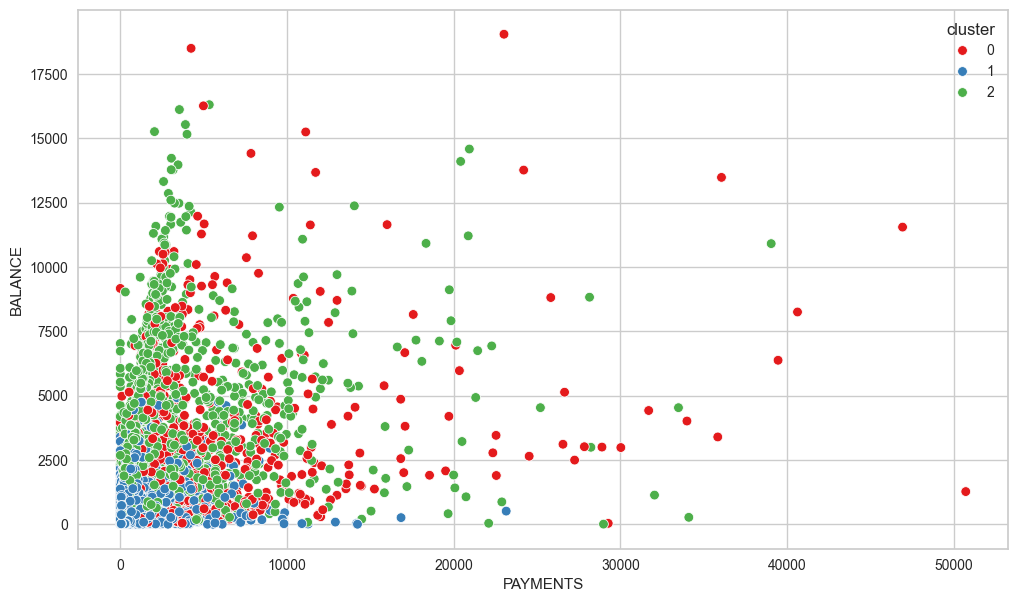

In [31]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=cc_df, x='PAYMENTS', y='BALANCE', hue='cluster', palette='Set1')
plt.show()

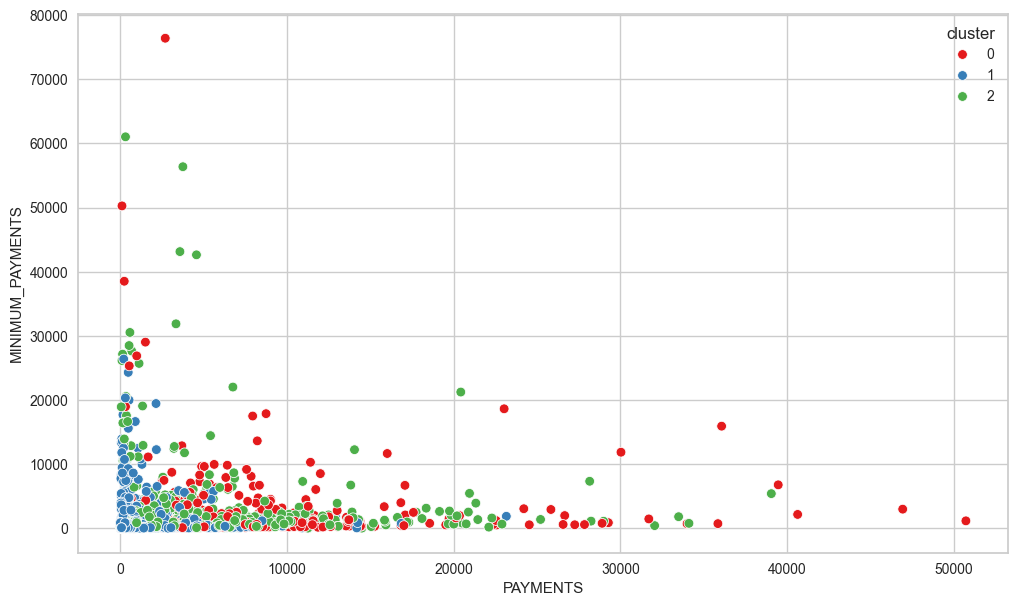

In [32]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=cc_df, x='PAYMENTS', y='MINIMUM_PAYMENTS', hue='cluster', palette='Set1')
plt.show()

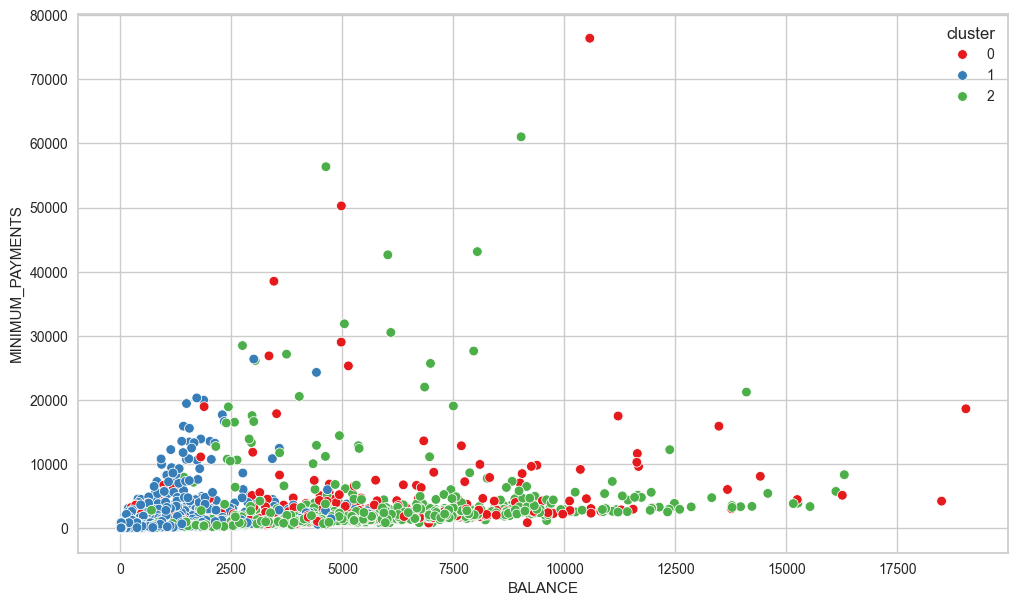

In [33]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=cc_df, x='BALANCE', y='MINIMUM_PAYMENTS', hue='cluster', palette='Set1')
plt.show()

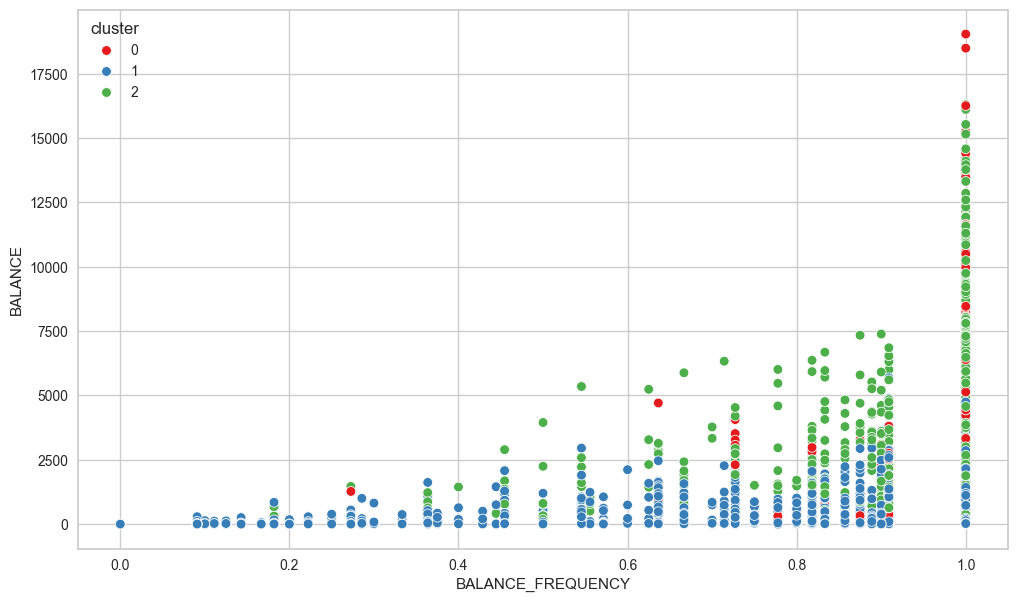

In [34]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=cc_df, x='BALANCE_FREQUENCY', y='BALANCE', hue='cluster', palette='Set1')
plt.show()

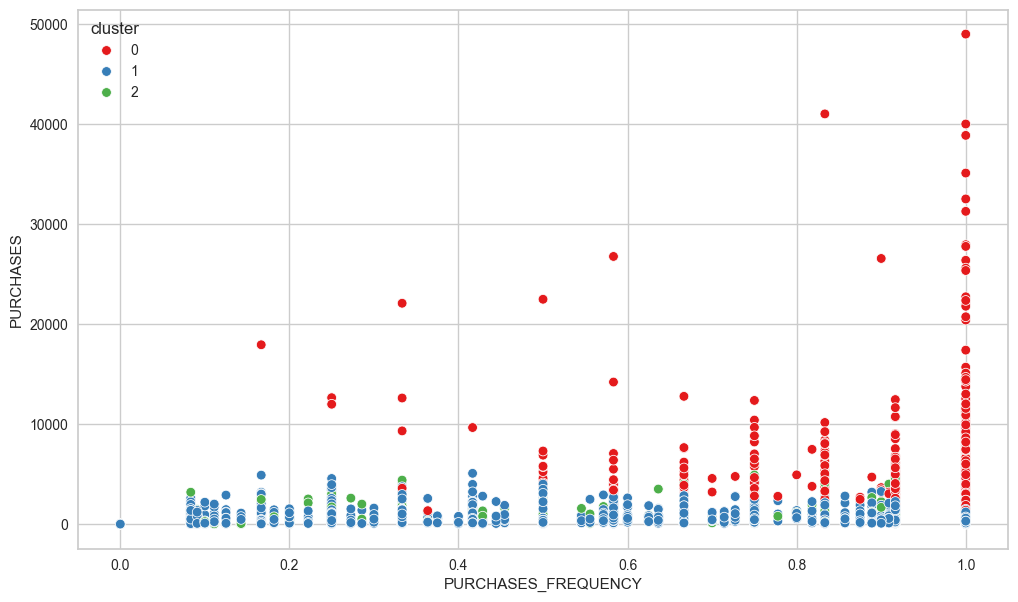

In [35]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=cc_df, x='PURCHASES_FREQUENCY', y='PURCHASES', hue='cluster', palette='Set1')
plt.show()

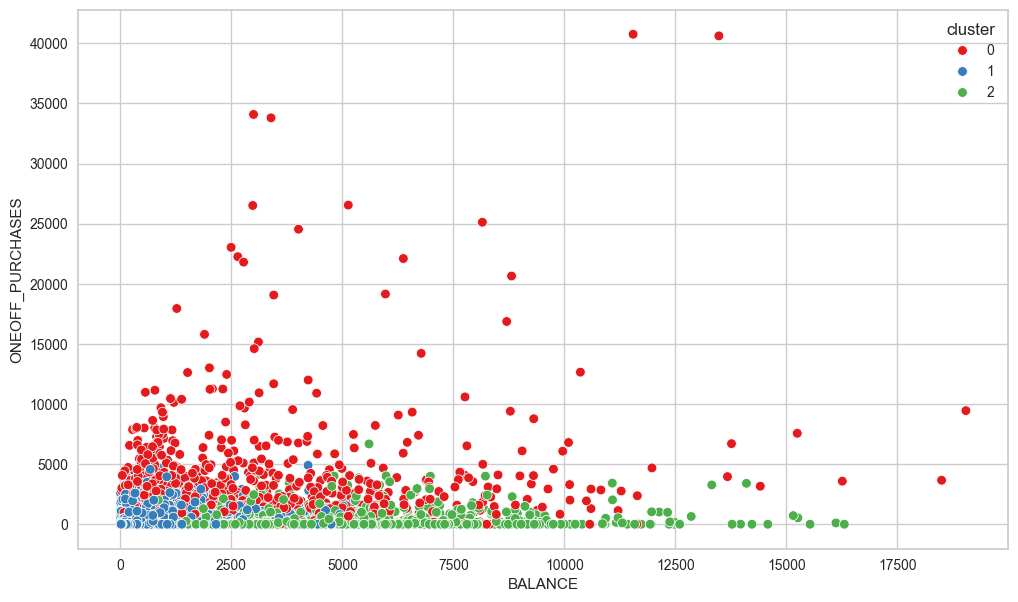

In [36]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=cc_df, x='BALANCE', y='ONEOFF_PURCHASES', hue='cluster', palette='Set1')
plt.show()

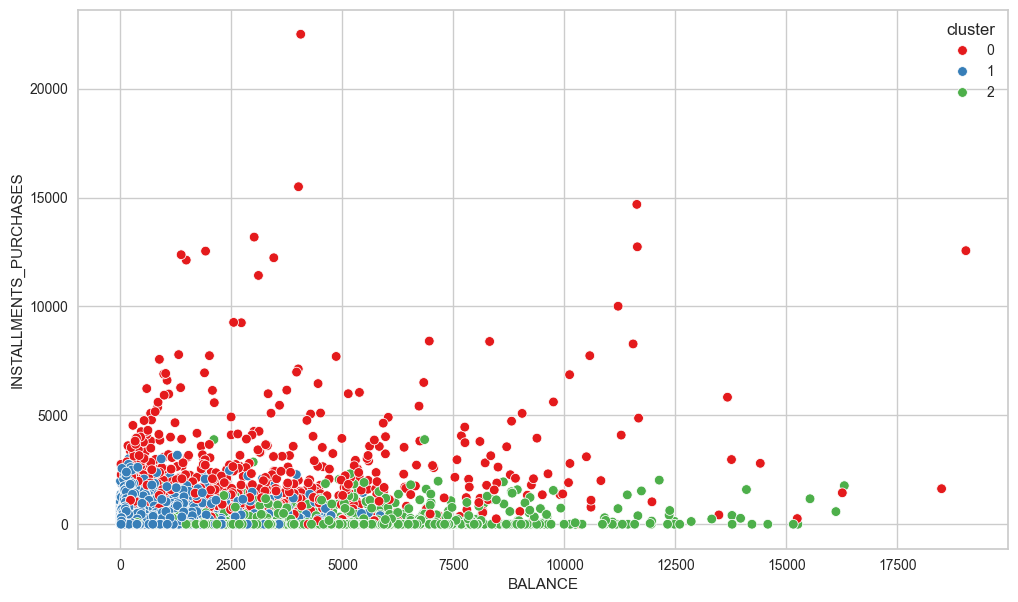

In [37]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=cc_df, x='BALANCE', y='INSTALLMENTS_PURCHASES', hue='cluster', palette='Set1')
plt.show()

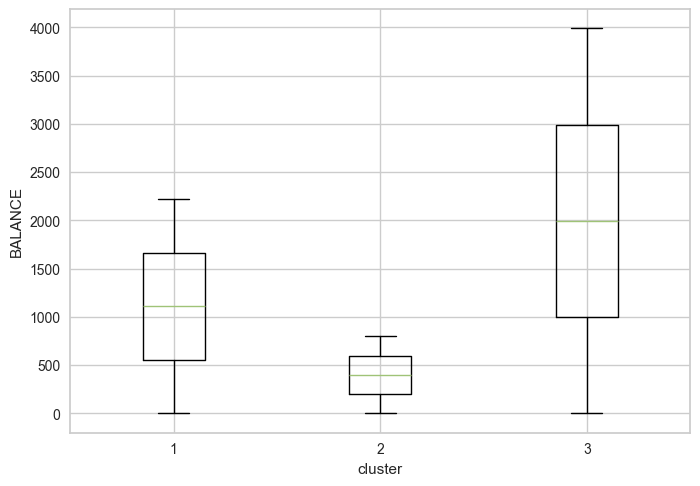

In [73]:
mean_balance = cc_df.groupby('cluster')['BALANCE'].mean().reset_index().transpose()

plt.boxplot(mean_balance)
plt.xlabel('cluster')
plt.ylabel('BALANCE')
plt.show()

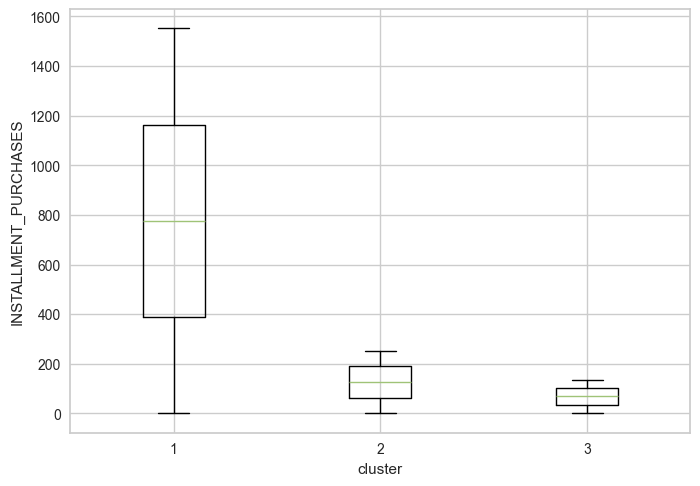

In [74]:
mean_installment_purchases = cc_df.groupby('cluster')['INSTALLMENTS_PURCHASES'].mean().reset_index().transpose()

plt.boxplot(mean_installment_purchases)
plt.xlabel('cluster')
plt.ylabel('INSTALLMENT_PURCHASES')
plt.show()

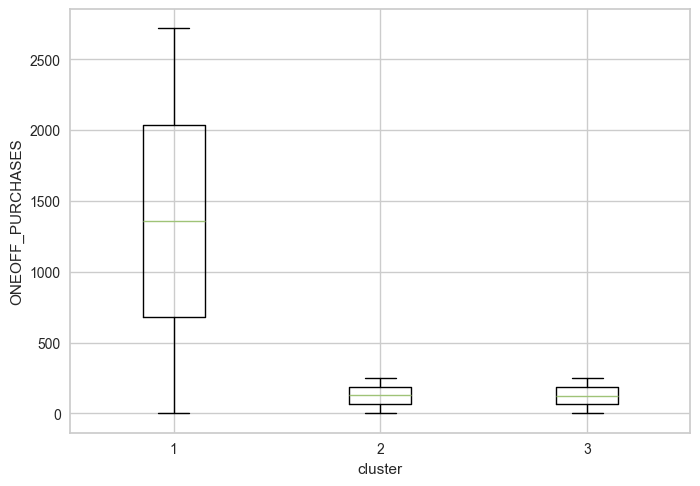

In [78]:
mean_oneoff_purchases = cc_df.groupby('cluster')['ONEOFF_PURCHASES'].mean().reset_index().transpose()

plt.boxplot(mean_oneoff_purchases)
plt.xlabel('cluster')
plt.ylabel('ONEOFF_PURCHASES')
plt.show()

- Cluster 0 is the cluster with expensive purchases

- Cluster 1 is the cluster with the lowest balances balance and low spender

- Cluster 2 is the cluster with the highest balances and low spender

Visualizing using PCA

In [38]:
PrincipalComponent_cc = PCA(n_components=2)

PrincipalComponent_cc.fit(cc_df)
PCA_ = PrincipalComponent_cc.transform(cc_df)

In [39]:
x, y = PCA_[:, 0], PCA_[:, 1]
df_pca = pd.DataFrame({'x': x, 'y': y, 'cluster' : kmeans.labels_})
groups = df_pca.groupby('cluster')

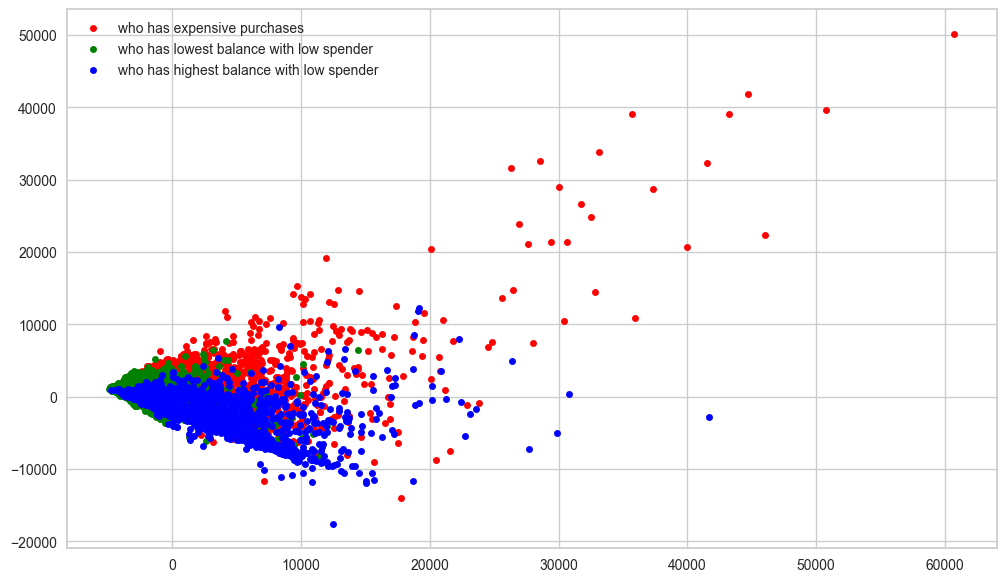

In [40]:
colors = {0: 'red', 1: 'green', 2:'blue'}

names = {0: 'who has expensive purchases', 1:'who has lowest balance with low spender', 2:'who has highest balance with low spender'}

fig, ax = plt.subplots(figsize=(12, 7))

for name, group in groups:
    ax.plot(
        group.x,
        group.y,
        marker='o',
        color=colors[name],
        label=names[name],
        linestyle='',
        ms=5,
    )

ax.legend()
plt.show()